# Generate comparative test networks

In [75]:
import networkx as nx

In [94]:
nodes1 = [1,2,3,4,5,6,7,8,9]
edges1 = [(1,2),(1,3),(1,4),(1,5),(2,3),(1,6),(1,7),(1,8),(1,9)]
test_graph1 = nx.Graph()
test_graph1.add_nodes_from(nodes1)
test_graph1.add_edges_from(edges1)

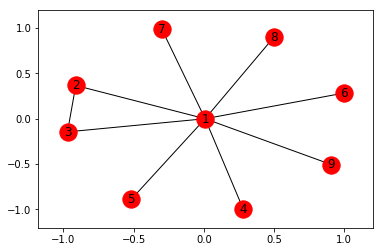

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
nx.draw_networkx(test_graph1, with_labels = True)
plt.show()

In [97]:
nodes2 = [1,2,3,4,5,6,7,8,9, 10, 11, 12]
edges2 = [(1,2),(2,3),(3,1),(1,4),(1,5),(1,6),(2,7),(2,8),(2,9),(3,10),(3,11), (3,12)]
test_graph2 = nx.Graph()
test_graph2.add_nodes_from(nodes2)
test_graph2.add_edges_from(edges2)

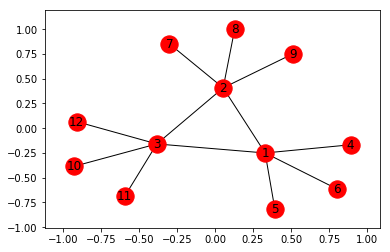

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
nx.draw_networkx(test_graph2, with_labels = True)
plt.show()

In [80]:
nodes3 = [1,2,3,4,5,6,7,8,9]
edges3=[(1,2),(2,3),(3,1),(4,1),(5,1),(6,2),(7,2),(8,3),(9,3)]
test_graph3 = nx.Graph()
test_graph3.add_nodes_from(nodes3)
test_graph3.add_edges_from(edges3)

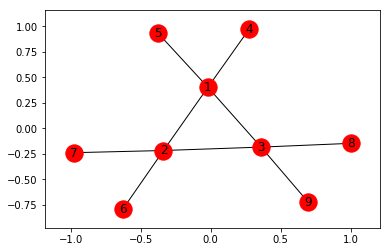

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
nx.draw_networkx(test_graph3, with_labels = True)
plt.show()

In [101]:
nodes4 = [1,2,3,4]
edges4=[(1,2),(2,3),(3,1),(1,4)]
test_graph4 = nx.Graph()
test_graph4.add_nodes_from(nodes4)
test_graph4.add_edges_from(edges4)

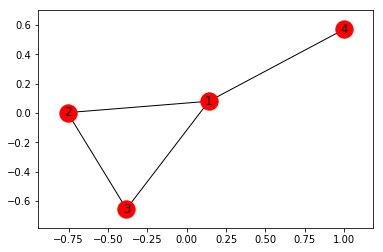

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
nx.draw_networkx(test_graph4, with_labels = True)
plt.show()

# Identify size-k subgraphs

In [139]:
def subgraph_k(Graph, k):
    Graph = Graph
    root = Graph.nodes()
    #new_root = sort_root(Graph, root)
    subgraphsize = k-1
    iteration = 1
    sub = []
    for n in root:
        first = [n]
        neighbors= []
        neighbors.append(first)
        for x in Graph.neighbors(n):
            if (n < x):
                neighbors.append(x)
        sub.append(neighbors)
    while iteration < subgraphsize:
        iteration += 1
        sub = iterate_k(Graph, sub)
    subgraphs = return_subgraphs(Graph, sub, k) 

In [85]:
 def iterate_k(Graph, sub):
    Graph = Graph
    itersub = sub
    sub = []
    for subset in itersub:
        for node in subset:
            first = []
            for n in subset[0]:
                first.append(n)
            neighbors = []
            if subset.index(node) != 0:
                first.append(node)
                neighbors.append(first)
                for n in first:
                    for neighbor in Graph.neighbors(n):
                        if (neighbor > first[len(first)-1]) and neighbor not in neighbors and neighbor not in first:
                            neighbors.append(neighbor)
            if neighbors != [] and len(neighbors) >1:
                sub.append(neighbors)
    return sub

In [112]:
def return_subgraphs(Graph, sub, k):
    nodes_total = []
    edges_total = []
    count = 0
    G = nx.Graph()
    for subset in sub:
        first = []
        for n in subset[0]:
            first.append(n)
        for set in subset:
            if subset.index(set) != 0:
                G.clear()
                nodes_in_sub=[]
                edges_in_sub=[]
                for f in first:
                    i = 0
                    while i < len(first)-1:
                        if (Graph.has_edge(f, first[i])):
                            if f not in nodes_in_sub:
                                nodes_in_sub.append(f)
                            if first[i] not in nodes_in_sub:
                                nodes_in_sub.append(first[i])
                            edges_in_sub.append((f, first[i]))
                        i = i +1
                    if (Graph.has_edge(f, set)):
                        if f not in nodes_in_sub:
                            nodes_in_sub.append(f)
                        if set not in nodes_in_sub:
                            nodes_in_sub.append(set)
                        edges_in_sub.append((f,set))
                G.add_nodes_from(nodes_in_sub)
                G.add_edges_from(edges_in_sub)
                %matplotlib inline
                import matplotlib.pyplot as plt
                plt.figure()
                nx.draw_networkx(G, with_labels = True)
                plt.show()
                count = count +1
    print("Total subgraphs of size",k, ": ",count)

In [134]:
def sort_root(Graph, root):
    for node in root:
        print(node, Graph.degree(node))

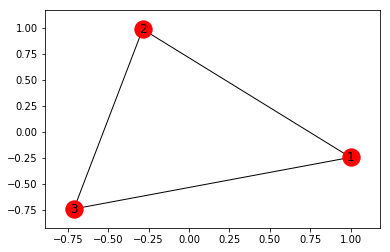

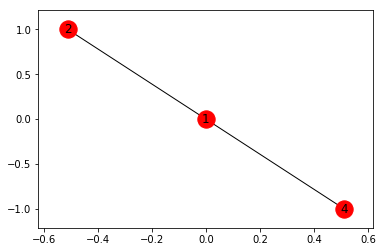

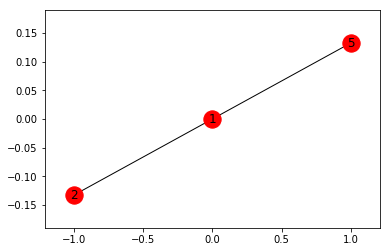

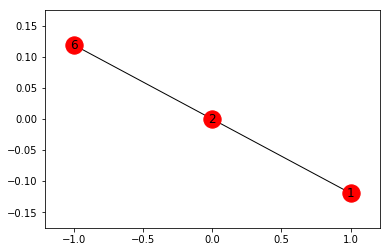

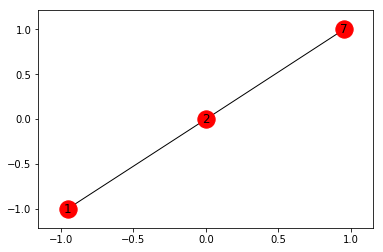

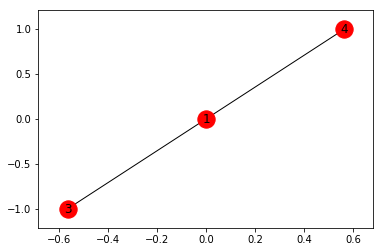

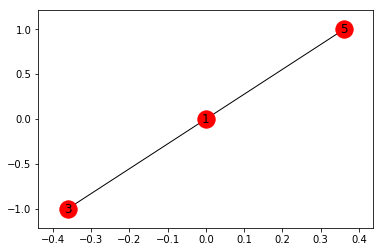

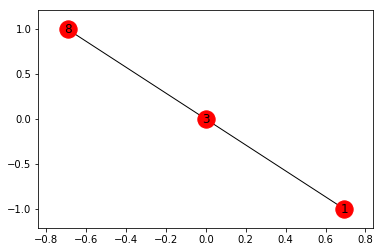

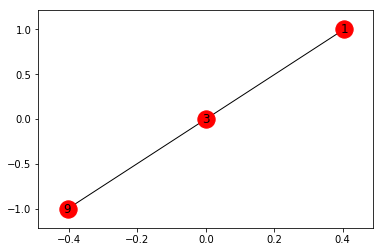

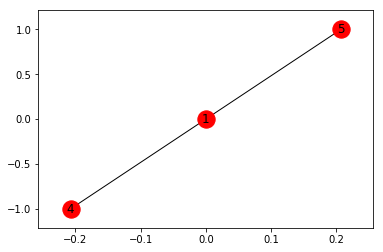

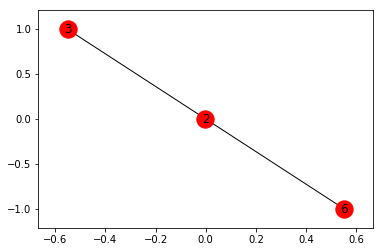

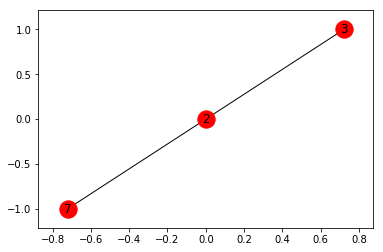

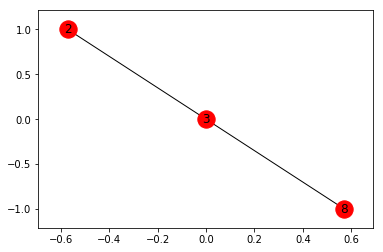

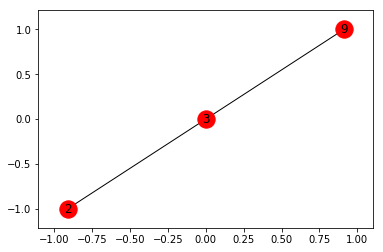

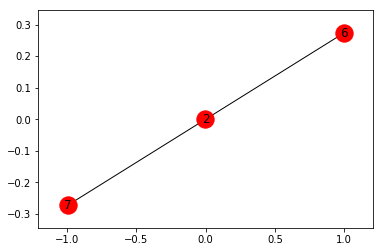

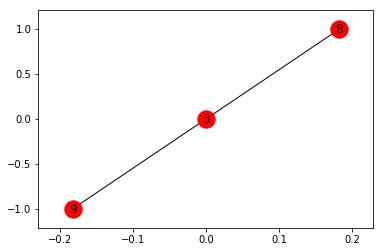

Total subgraphs of size 3 :  16


In [140]:
subgraph_k(test_graph3, 3)

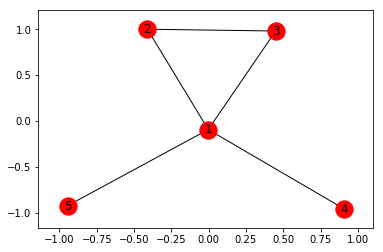

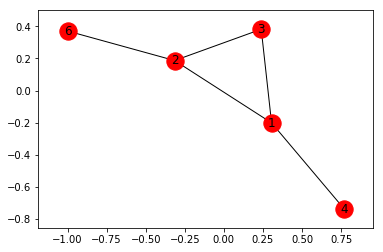

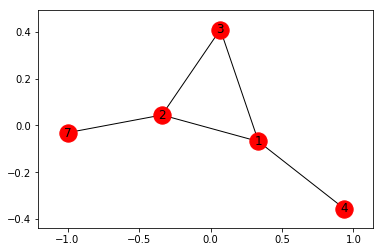

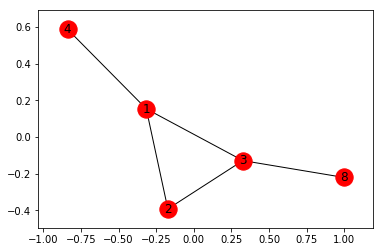

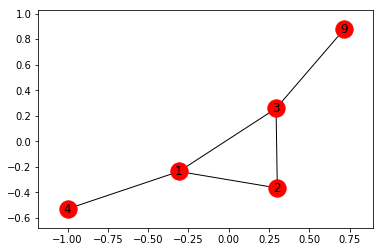

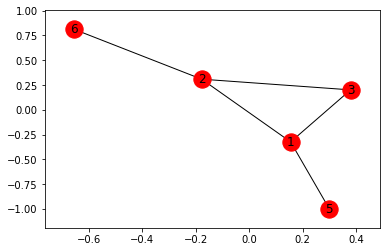

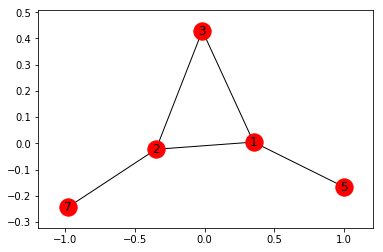

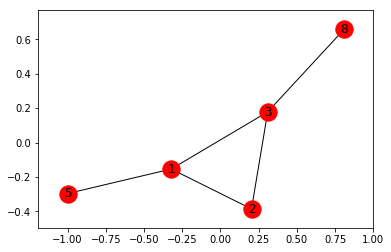

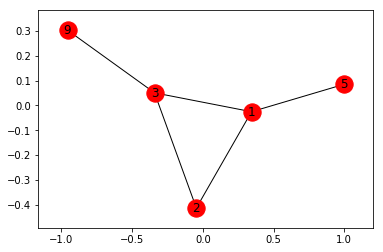

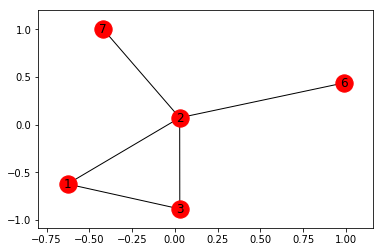

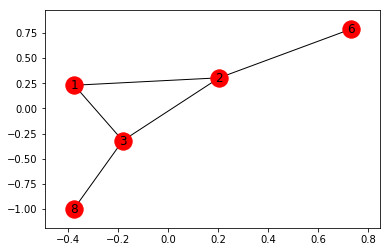

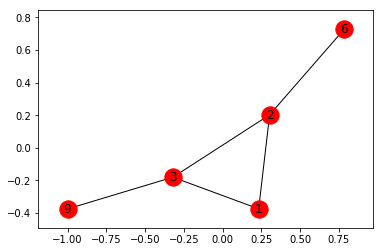

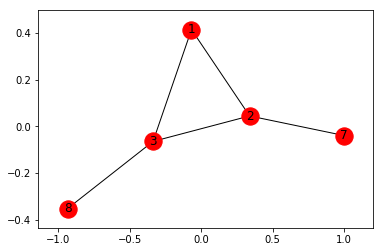

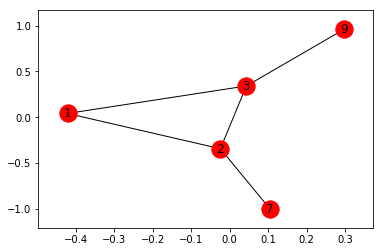

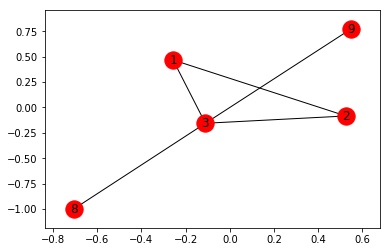

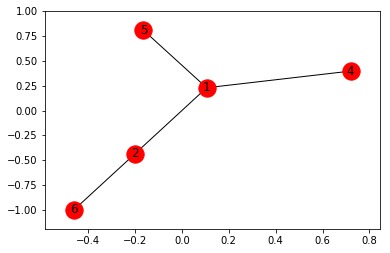

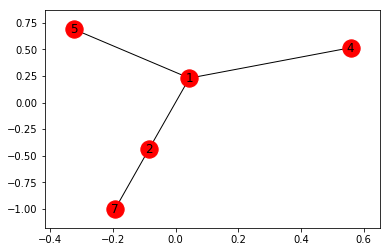

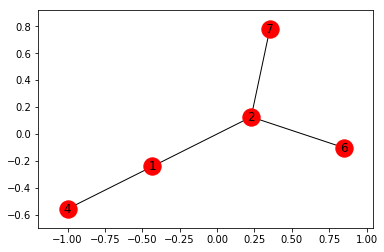

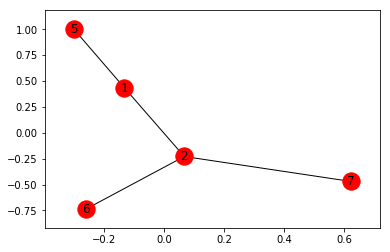

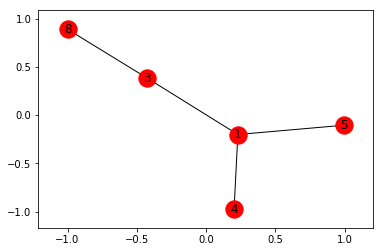

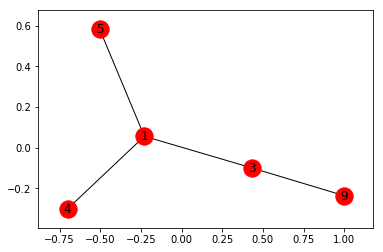

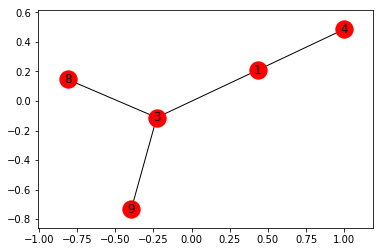

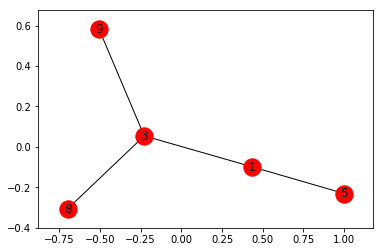

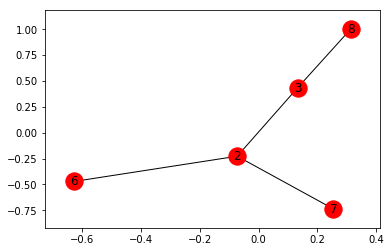

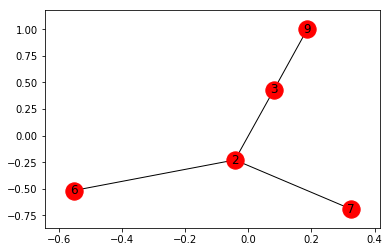

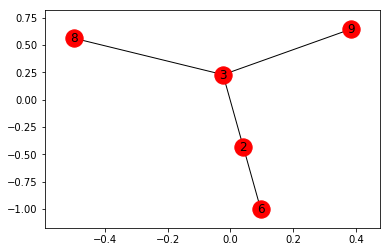

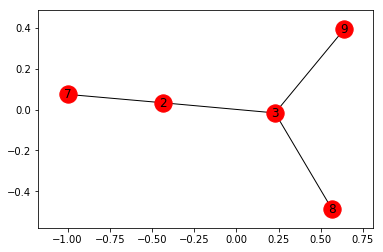

Total subgraphs of size 5 :  27


In [141]:
subgraph_k(test_graph3, 5)